In [1]:
import pandas as pd
import numpy as np
from sklearn import (linear_model,
                     metrics)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plot_for_log_reg import plot_probabilities_2d as pp_2d

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [4]:
diabetes_data.shape

(757, 8)

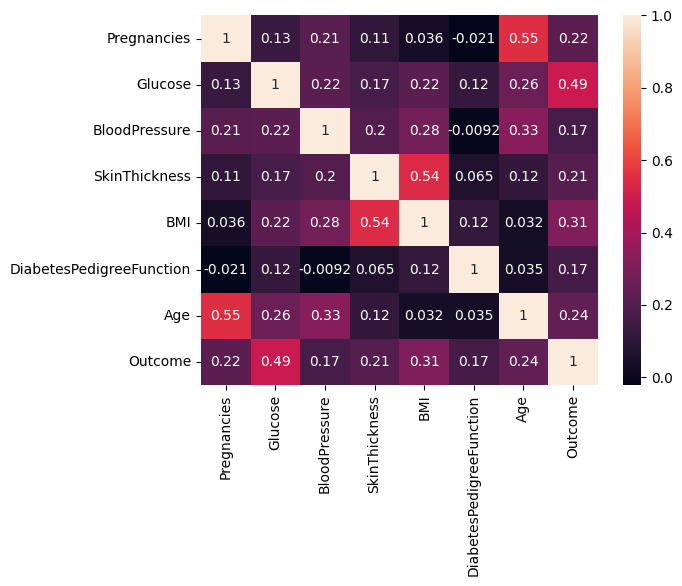

In [5]:
fig = plt.figure()
sns.heatmap(diabetes_data.corr(), annot=True);

In [6]:
features = diabetes_data.corr()['Outcome'].abs().sort_values(ascending=False)
features = features.drop('Outcome')

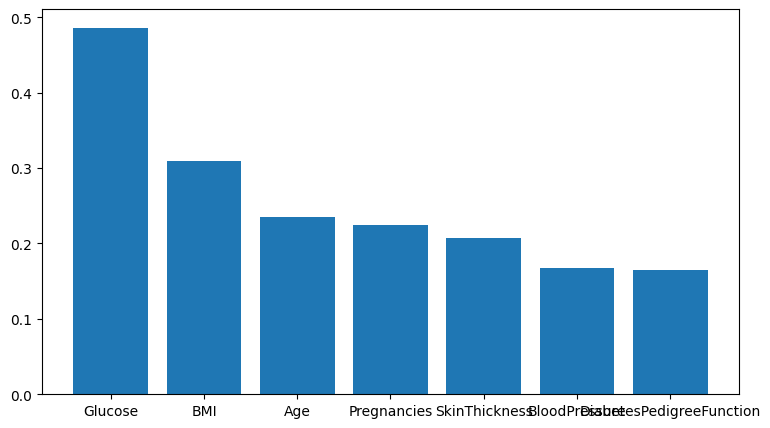

In [7]:
fig = plt.figure(figsize=(9, 5))
plt.bar(features.index, features.values);

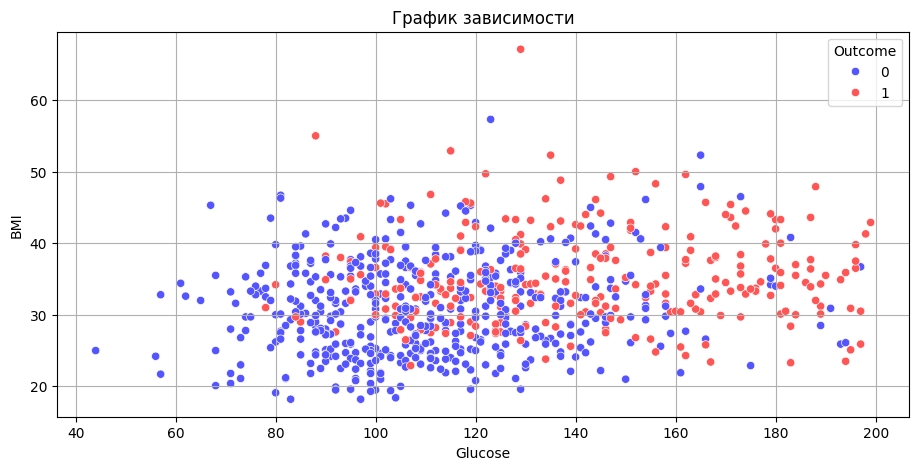

In [8]:
fig, ax = plt.subplots(figsize=(11, 5))
sns.scatterplot(
    diabetes_data,
    x='Glucose',
    y='BMI',
    hue='Outcome',
    palette='seismic'
)
plt.grid()
plt.title('График зависимости');

In [9]:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [10]:
log_reg_2d = linear_model.LogisticRegression(random_state=42)
log_reg_2d.fit(X, y)
print('w0 :', log_reg_2d.intercept_)
print('w1 :', log_reg_2d.coef_)

w0 : [-8.24901758]
w1 : [[0.03779291 0.08757414]]


In [11]:
x_new = pd.DataFrame({'Glucose' : [180], 'BMI' : [51]})
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted : {}'.format(np.round(y_new_proba_predict, 2)))

Predicted : [[0.05 0.95]]


In [12]:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(np.round(y_new_predict, 2)))

Predicted class: [1]


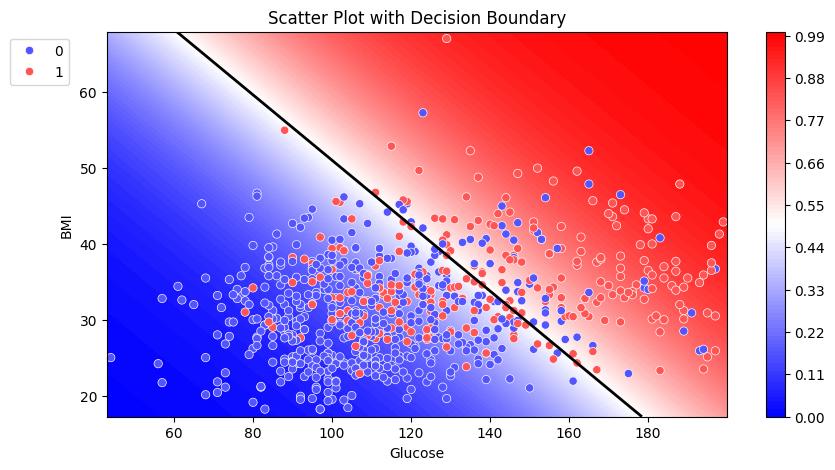

In [13]:
pp_2d(X, y, log_reg_2d)

In [14]:
X_train = diabetes_data.drop('Outcome', axis=1)
y_train = diabetes_data['Outcome']

In [15]:
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
log_reg_full.fit(X_train, y_train)
y_pred = log_reg_full.predict(X_train)

In [16]:
X_temp = X_train.copy()
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


In [17]:
pred1 = log_reg_2d.predict(X)
pred2 = log_reg_full.predict(X_train)

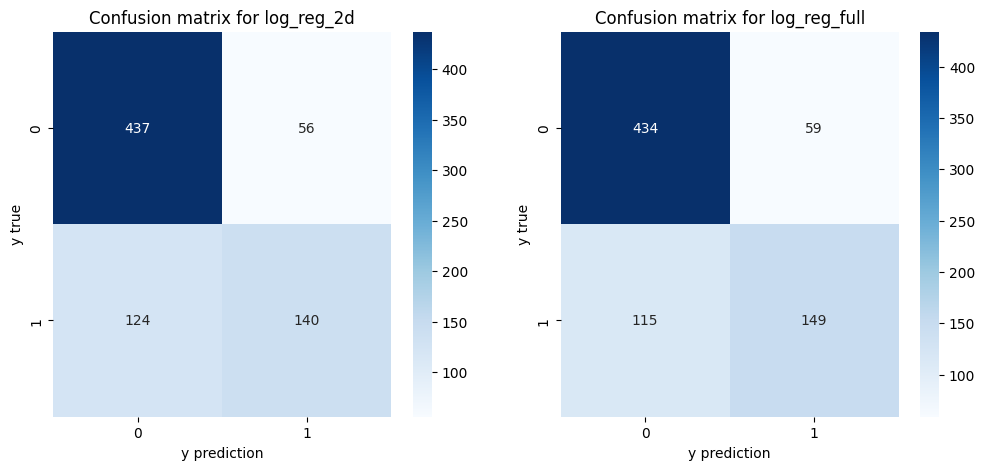

In [18]:
# Строим матрицы ошибок для обеих моделей.
confusion_matrix1 = metrics.confusion_matrix(y, pred1)
confusion_matrix2 = metrics.confusion_matrix(y, pred2)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix1, annot=True, ax=ax[0], cmap='Blues', fmt='')
ax[0].set_title('Confusion matrix for log_reg_2d')
ax[0].set_xlabel('y prediction')
ax[0].set_ylabel('y true')

sns.heatmap(confusion_matrix2, annot=True, ax=ax[1], cmap='Blues', fmt='')
ax[1].set_title('Confusion matrix for log_reg_full')
ax[1].set_xlabel('y prediction')
ax[1].set_ylabel('y true');

In [19]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, pred1)))
print('Precision: {:.2f}'.format(metrics.precision_score(y, pred1)))
print('Recall: {:.2f}'.format(metrics.recall_score(y, pred1)))
print('F1: {:.2f}'.format(metrics.f1_score(y, pred1)))

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1: 0.61


In [20]:
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, pred2)))
print('Precision: {:.2f}'.format(metrics.precision_score(y, pred2)))
print('Recall: {:.2f}'.format(metrics.recall_score(y, pred2)))
print('F1: {:.2f}'.format(metrics.f1_score(y, pred2)))

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1: 0.63


In [21]:
print(metrics.classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [33]:
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
y_proba_pred = pd.Series(y_proba_pred)
print(y_proba_pred)
percision_score = []
recall_score = []
f1_score = []

thresholds = np.arange(.1, 1, .05)

for threshold in thresholds:
    y_pred = y_proba_pred.apply(lambda x: 1 if x > threshold else 0)
    
    percision_score.append(metrics.precision_score(y, y_pred))
    recall_score.append(metrics.recall_score(y, y_pred))
    f1_score.append(metrics.f1_score(y, y_pred))

0      0.253821
1      0.173937
2      0.112300
3      0.205602
4      0.419553
         ...   
752    0.376464
753    0.023220
754    0.703505
755    0.506255
756    0.066905
Length: 757, dtype: float64


ValueError: Found input variables with inconsistent numbers of samples: [333, 757]

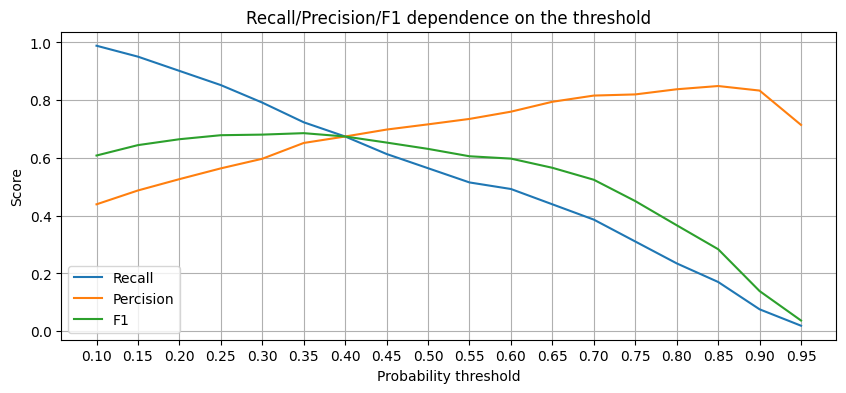

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(thresholds, recall_score, label='Recall')
ax.plot(thresholds, percision_score, label='Percision')
ax.plot(thresholds, f1_score, label='F1')

ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.grid()
ax.legend();

In [24]:
threshold_opt = .4
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



## Мультиклассовая классификация


In [25]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [27]:
penguins_data = penguins_data.dropna()

In [28]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [29]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [30]:
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42,
)
log_reg.fit(X_dummies, y)
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
y_pred = log_reg.predict(X_dummies)

In [31]:
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
y_pred_df = pd.DataFrame(
    y_pred,
    columns=['Predicted class']
)
y_df = pd.concat([ y_pred_proba_df, y_pred_df], axis=1)
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.78,0.22,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [32]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

